# Exercise 2 - Week 4
## Credit Scoring Dataset: Data Exploration and Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'credit_scoring.csv' with the actual path
df = pd.read_csv("C:/Users/rachi/Downloads/Machine Learning/Lab/week4/WEEK4/credit_scoring_eng.csv")

# Inspect structure
df.info()

# Basic statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,1.935100e+04,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,1.674223e+05,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,1.029716e+05,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,2.066726e+04,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.030532e+05,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.450179e+05,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,2.034351e+05,NaN


In [8]:
# Grouping and sorting
df_sorted = df.sort_values(by=['children','days_employed','dob_years'])
df_sorted.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
15147,-1,-9851.184337,44,secondary education,1,divorced,3,F,employee,0,110990.810581,to own a car
12304,-1,-8493.101252,61,bachelor degree,2,married,0,M,employee,0,315006.182056,property
7190,-1,-5928.202068,34,SECONDARY EDUCATION,1,married,0,M,employee,0,184315.121979,car purchase
17657,-1,-4571.957475,41,secondary education,1,married,0,F,employee,0,122105.415823,transactions with my real estate
291,-1,-4417.703588,46,secondary education,1,civil partnership,1,F,employee,0,102816.346412,profile education


In [9]:
# iloc and loc
print(df.iloc[0])  # First row
print(df.loc[df['education'] =='Secondary' ])

# Crosstab example
pd.crosstab(df['education'], df['education_id'])


children                                1
days_employed                -8437.673028
dob_years                              42
education                  masters degree
education_id                            0
family_status                     married
family_status_id                        0
gender                                  F
income_type                      employee
debt                                    0
total_income                253875.639453
purpose             purchase of the house
Name: 0, dtype: object
Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []


education_id,0,1,2,3,4
education,,,,,
ACADEMIC DEGREE,0,0,0,0,1
Academic Degree,0,0,0,0,1
BACHELOR DEGREE,0,0,29,0,0
Bachelor Degree,0,0,47,0,0
MASTERS DEGREE,274,0,0,0,0
Masters Degree,268,0,0,0,0
PRIMARY EDUCATION,0,0,0,17,0
Primary Education,0,0,0,15,0
SECONDARY EDUCATION,0,772,0,0,0


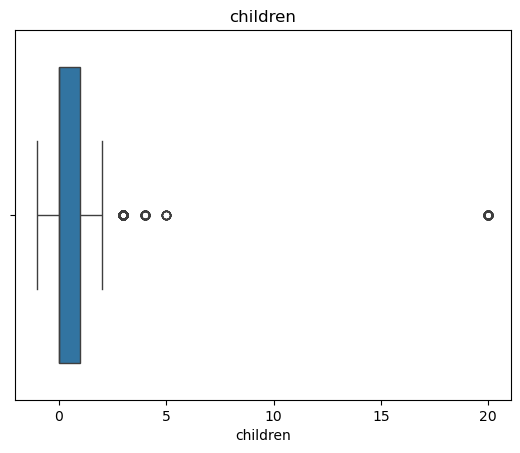

Z-scores above 3:
(array([   85,   130,   241,   519,   547,   646,   933,   961,  1030,
        1055,  1247,  1711,  1879,  2236,  2254,  2277,  2601,  2666,
        2666,  2754,  2844,  3311,  3333,  3340,  3368,  3498,  3737,
        3964,  4454,  4461,  4541,  4803,  4832,  4844,  5489,  5799,
        5816,  6128,  6181,  6197,  6208,  6361,  6368,  6402,  6404,
        6407,  6566,  6649,  6798,  7046,  7118,  7204,  7289,  7613,
        7841,  7942,  8031,  8053,  8091,  8196,  8274,  8665,  8927,
        9174,  9199,  9205,  9307,  9362,  9375,  9382,  9526,  9568,
        9696,  9737,  9993, 10179, 10319, 10336, 10347, 10355, 10437,
       10518, 10564, 10764, 10812, 10876, 11015, 11024, 11025, 11091,
       11109, 11172, 11300, 11478, 11642, 11821, 11885, 11926, 11949,
       11982, 12091, 12100, 12116, 12144, 12161, 12191, 12284, 12591,
       12949, 13055, 13058, 13090, 13177, 13222, 13331, 13640, 13776,
       13793, 13879, 13900, 14120, 14205, 14249, 14258, 14315, 14320,
 

In [11]:
# Boxplot, Z-score, IQR
from scipy import stats

# Visualize with boxplots
sns.boxplot(x=df['children'])
plt.title('children')
plt.show()

# Z-score method
z_scores = np.abs(stats.zscore(df[['children','days_employed','dob_years']].dropna()))
print("Z-scores above 3:")
print(np.where(z_scores > 3))

# IQR method
Q1 = df[['children','days_employed','dob_years']].quantile(0.25)
Q3 = df[['children','days_employed','dob_years']].quantile(0.75)
IQR = Q3 - Q1
print("IQR Outliers:")
print(((df[['children','days_employed','dob_years']] < (Q1 - 1.5 * IQR)) |
       (df[['children','days_employed','dob_years']] > (Q3 + 1.5 * IQR))).sum())


In [ ]:
# Capping example for income
df['education_id'] = np.where(df['education_id'] > df['income'].quantile(0.95), df['income'].quantile(0.95), df['income'])

# Handling missing data
df.fillna(df.median(numeric_only=True), inplace=True)


In [ ]:
# Convert categorical to numeric
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


In [7]:
# Bar plot
df['credit_status'].value_counts().plot(kind='bar', title='Credit Status Counts')
plt.show()

# Pie chart
df['employment_length'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Employment Length Distribution')
plt.show()

# Scatter plot
sns.scatterplot(x='loan_amount', y='income', hue='credit_status', data=df)
plt.title('Loan vs Income by Credit Status')
plt.show()

# Distribution plots
sns.histplot(df['years_employed'], kde=True)
plt.title('Distribution of Years Employed')
plt.show()


KeyError: 'credit_status'